## Welcome, to the 2nd last practical

This tutorial will show you how to classify the data between nonfermented and fermented data.
 - there are many methods to classify data, but it can be summarised into basic statistical methods, Machine learning, and deep learning.
 - Given the small size of the data this is notebook will focus on developing statistical methods for classifying fermented tea from nonfermented
 - we also show how we compute SD using a jackknife.
 
 

<img src="pics/dog.jpg" width="500" height="250">


the above picture just demonstrates the simple idea behind classifying an object, in our case we are classifying tea. where our features would be TPC, TEAC, and FRAP.

### ROC curves, where the classification is based on a simple threshold

import the data, and get some packages 

In [56]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import *
from sklearn import metrics
from sklearn.model_selection import train_test_split
from source.roc import draw_roc # an imported python function from the source.roc python file
from source.baseline_acc import get_accuracy_base # importing the baseline code from source.basline file, the baseline that is used called as "Mahalanobis distance" link "https://en.wikipedia.org/wiki/Mahalanobis_distance"
from source.calculate_jack import jack_SD # importing the baseline code from source.basline file
import pandas as pd

%store -r df_nf
%store -r df_fer
%store -r df

print(df.shape) 

(98, 8)


In [25]:
print(df.head(2))

   type    TPC_MEOH    TEAC_MEOH    FRAP_MEOH  TPC_H2O  TEAC_H2O  FRAP_H2O cut
0     0  275.767474  2821.888864  1180.778887   314.33   2588.61    584.61  FC
1     0  253.494375  2355.706326   647.096605   331.41   2818.87    589.91  LL


In [43]:
feat_H2O = ['TPC_H2O', 'TEAC_H2O',  'FRAP_H2O'] # define the input (features)
feat_MEOH = ['TPC_MEOH', 'TEAC_MEOH',  'FRAP_MEOH'] # define the input (features)

y = df[['type']] # define the output (target)

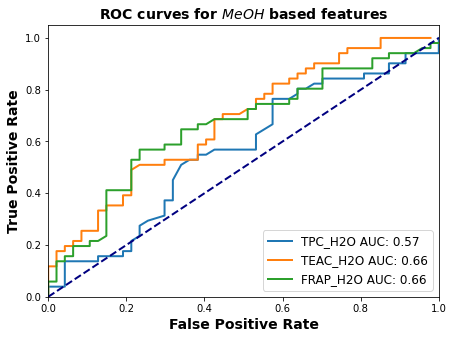

In [44]:
# ROC curves, should it be done on the entire data set, or just the training
di_h2o =[True, False, False] # if one of the features direction is below the 45 degrees, then we make it False
draw_roc (df, di_h2o, feat_H2O, y)


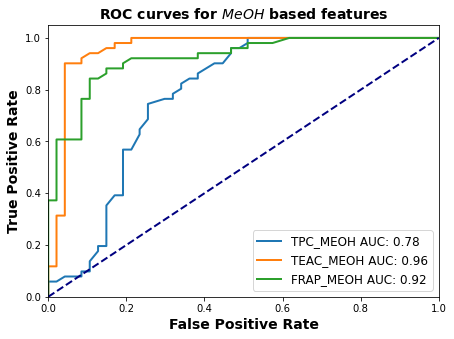

In [48]:
### ------- please do it for meoh extract ------------
di_meoh =[True, True, True]
draw_roc ()

Notice the following:
 - the True positive rate = sensitivity = recall
 - false-positive rate = (1-specificity), it tells you the proportion of the 2nd class which was not correctly classified, so the more you go to the right, the worse

### Statistical Baseline


In [49]:
y = df[['type']]


features = [ ['TPC_H2O'], ['TEAC_H2O'],  ['FRAP_H2O'], ['TPC_H2O', 'TEAC_H2O']]

splits = [0.4]

In [50]:
base_dict = {} # https://www.geeksforgeeks.org/python-nested-dictionary/  (for more exploration around dictionaries) 

In [51]:
for s in splits:
    X_train, X_test, y_train, y_test = train_test_split(df, y, test_size= s, random_state=1, stratify = y, shuffle = True)
    
    for f in features:
        xtr =  X_train[f]
        xte =  X_test[f]
        results = get_accuracy_base (xtr, y_train, xte, y_test, len(f)) # to get the accuarcies for the baseline
        
        key = str(s)+","+str(f)
        
        base_dict[key] = {}
        base_dict[key]['tot_acc'] = results[0]
        base_dict[key]['jack_train'] = results[1]
        base_dict[key]['jack_test'] = results[2]
        # print(base_dict)
        # print()

In [52]:
%store base_dict

Stored 'base_dict' (dict)


### playing around with dictionaries 

In [53]:
print(base_dict.keys())
key = list(base_dict.keys())[0]
print( base_dict[key].keys() )

dict_keys(["0.4,['TPC_H2O']", "0.4,['TEAC_H2O']", "0.4,['FRAP_H2O']", "0.4,['TPC_H2O', 'TEAC_H2O']"])
dict_keys(['tot_acc', 'jack_train', 'jack_test'])


### now let us graph the accuarcy with the SD

In [54]:
acc_arr = [] 
sd_arr = [] 


for key in base_dict.keys():
    
    print( str(key)+": "+str(base_dict[key][ 'tot_acc' ] ))
    acc_arr.append(base_dict[key][ 'tot_acc' ]) # append total accuarcy to an array
    sd_train = jack_SD( np.zeros( len(base_dict[key][ 'jack_train' ]) ), base_dict[key][ 'jack_train' ])[0]
    sd_test = jack_SD( np.zeros( len(base_dict[key][ 'jack_test' ]) ), base_dict[key][ 'jack_test' ])[0]
    sd = np.sqrt( np.array((sd_train**2)) + np.array((sd_test**2)))
    sd_arr.append(sd) # append sd_arr to an array

    print(sd)
    print()
    


0.4,['TPC_H2O']: 0.55
0.08996396844211696

0.4,['TEAC_H2O']: 0.675
0.13291317134775255

0.4,['FRAP_H2O']: 0.75
0.3032381727198833

0.4,['TPC_H2O', 'TEAC_H2O']: 0.85
0.05717718748968661



<ErrorbarContainer object of 3 artists>

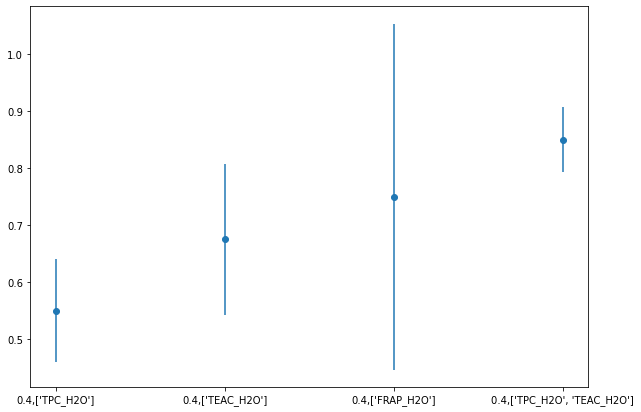

In [55]:
plt.figure(figsize=(10 , 7))
plt.errorbar( list(base_dict.keys()), acc_arr, sd_arr, fmt='o')


### Now try to add more feature, and try with methanol

In [39]:
# ----- code here ------------

### Now try to mix both methanol and water extracts

In [40]:
# ----- code here ------------

### now draw a conclusion
- hint: usually it be the highest accuracy with the lowest SD will be the best method